In [186]:
import random
from statistics import stdev, pstdev, mean
import numpy as np
import math
import matplotlib.pyplot as plt

In [187]:
%matplotlib inline

In [188]:
def the_coin():
    return random.randint(1,2)

In [189]:
def coin_flipping(n=16):
    heads = 0
    tails = 0
    count = 0
    total_heads = []
    total_tails = []
    
    while count < 2**n:
        the_flip = the_coin()
        if the_flip == 1:
            heads += 1
            count += 1
        else:
            tails += 1
            count += 1
        for i in range(n + 1):
            if count == 2**i:
                total_heads.append(heads)
                total_tails.append(tails)
    return total_heads, total_tails

In [190]:
heads, tails = coin_flipping()

In [191]:
print(heads, tails)

[0, 1, 2, 6, 11, 19, 34, 62, 117, 243, 477, 988, 1998, 4096, 8294, 16479, 32699] [1, 1, 2, 2, 5, 13, 30, 66, 139, 269, 547, 1060, 2098, 4096, 8090, 16289, 32837]


In [192]:
sum(heads) / sum(tails)

0.9997101228163857

In [193]:
diff = [tails[i] - heads[i] for i in range(len(heads))]

In [194]:
print(diff)

[1, 0, 0, -4, -6, -6, -4, 4, 22, 26, 70, 72, 100, 0, -204, -190, 138]


# Line Plot

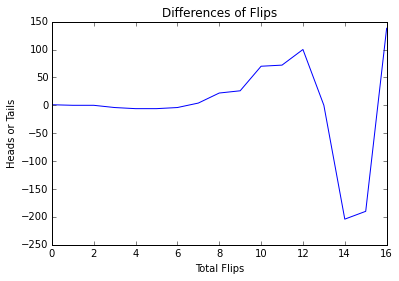

In [195]:
x = diff
y = 16
plt.plot(x)
plt.xlabel("Total Flips")
plt.ylabel("Heads or Tails")
plt.title("Differences of Flips")
plt.show()

In [196]:
# The difference is about even until 2**14th

# Ratio of Heads to Tails

In [197]:
ratio = [heads[i] / tails[i] for i in range(len(heads))]

In [198]:
print(ratio)

[0.0, 1.0, 1.0, 3.0, 2.2, 1.4615384615384615, 1.1333333333333333, 0.9393939393939394, 0.841726618705036, 0.9033457249070632, 0.8720292504570384, 0.9320754716981132, 0.9523355576739753, 1.0, 1.0252163164400494, 1.011664313340291, 0.9957974236379694]


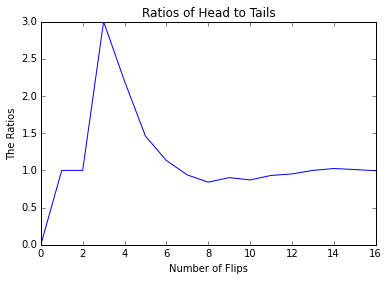

In [199]:
y = ratio
x = 16
plt.plot(y)
plt.xlabel("Number of Flips")
plt.ylabel("The Ratios")
plt.title("Ratios of Head to Tails")
plt.show()

In [200]:
# The ratio evens out around 2**10th

#Scatter Plot

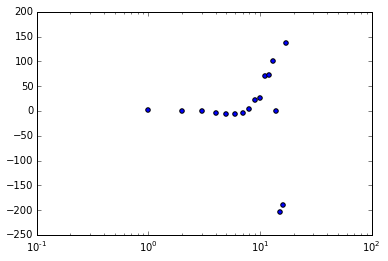

In [201]:
plt.scatter(range(1,18), diff)
plt.xscale('log')

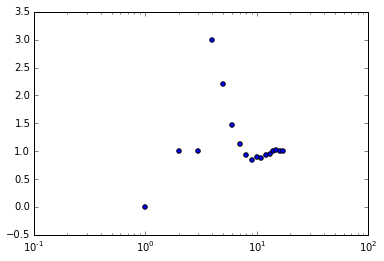

In [202]:
plt.scatter(range(1,18), ratio)
plt.xscale('log')

# Now lets run 20 trials of 2**16!

In [245]:
def coin_flipping_trial(n=16):
    heads = 0
    tails = 0
    count = 0
    total_heads = []
    total_tails = []
    
    while count < 2**n:
        the_flip = the_coin()
        if the_flip == 1:
            heads += 1
            count += 1
        else:
            tails += 1
            count += 1
        for i in range(n + 1):
            if count == 2**i:
                total_heads.append(heads)
                total_tails.append(tails)
        arrg = np.array([total_heads, total_tails])
        
    trial_std = np.std(arrg)
        

    return trial_std


In [246]:
trial_results = []
trials_mean = []
trials_stdev = []
counts = 0
while counts < 20:
    coin_flipping_trial()
    trial_results.append(coin_flipping_trial())
    counts += 1
    


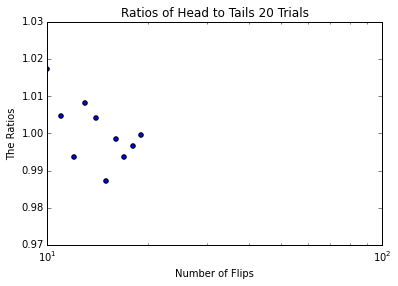

In [232]:
plt.scatter(range(0,20), trial_results)
plt.xscale('log')
plt.xlabel("Number of Flips")
plt.ylabel("The Ratios")
plt.title("Ratios of Head to Tails 20 Trials")
plt.show()

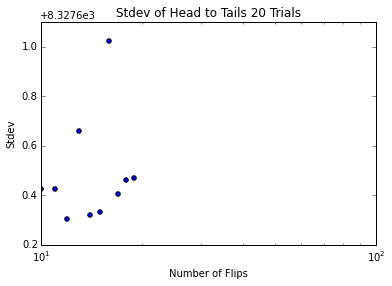

In [248]:
plt.scatter(range(0,20), trial_results)
plt.xscale('log')
plt.xlabel("Number of Flips")
plt.ylabel("Stdev")
plt.title("Stdev of Head to Tails 20 Trials")
plt.show()

In [268]:
def coin_flips(num):
    
    heads = 0
    tails = 0
    
    for _ in range(num):
        if the_coin() == 1:
            heads += 1
        else:
            tails += 1
    
    return heads/tails

In [291]:
trials_100 = []
for i in range(0,100000):
    trials_100.append(coin_flips(100))

(array([  1.05500000e+03,   2.31480000e+04,   4.48670000e+04,
          2.42820000e+04,   4.93300000e+03,   1.53700000e+03,
          1.37000000e+02,   3.60000000e+01,   3.00000000e+00,
          2.00000000e+00]),
 array([ 0.4084507,  0.637976 ,  0.8675013,  1.0970266,  1.3265519,
         1.5560772,  1.7856025,  2.0151278,  2.2446531,  2.4741784,
         2.7037037]),
 <a list of 10 Patch objects>)

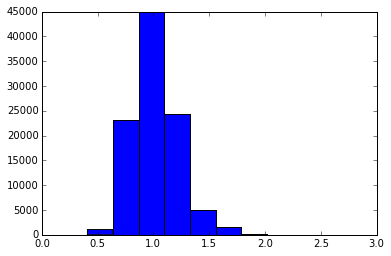

In [292]:
plt.hist(trials_100)

In [272]:
trials_1000 = []
for i in range(0,100000):
    trials_1000.append(coin_flips(1000))

(array([  6.30000000e+01,   1.15000000e+03,   9.69100000e+03,
          2.77670000e+04,   3.17270000e+04,   2.08260000e+04,
          7.35500000e+03,   1.25200000e+03,   1.56000000e+02,
          1.30000000e+01]),
 array([ 0.75746924,  0.8132038 ,  0.86893836,  0.92467292,  0.98040747,
         1.03614203,  1.09187659,  1.14761114,  1.2033457 ,  1.25908026,
         1.31481481]),
 <a list of 10 Patch objects>)

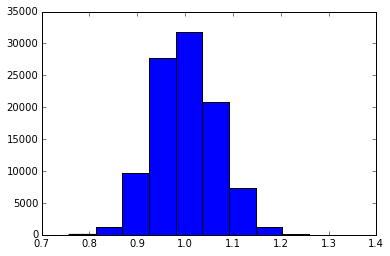

In [274]:
plt.hist(trials_1000)

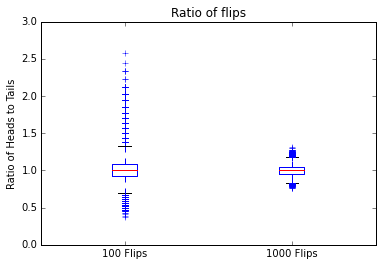

In [280]:
plt.boxplot([trials_100, trials_1000])
plt.title("Ratio of flips")
plt.ylabel("Ratio of Heads to Tails")
plt.xticks((1,2),["100 Flips", "1000 Flips"])
plt.show()

# Ok so it is just like we thought it would be. The ratio of Heads to Tails is right around 1 and as we run more trials it get even closer to a 1 for 1 ratio which is pretty visible in our box plots.